In [56]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2

In [32]:
image = Image.open("../img/street.jpg").convert("L")
image_np = np.array(image)

In [33]:
image_np.shape

(344, 345)

### Roberts算子

#### padding in numpy

In [34]:
arr1 = np.array([[1,2,3],[4,5,6],[7,8,9]])
arr2 = np.pad(arr1,((3,2),(2,2)),"edge")

In [35]:
arr2

array([[1, 1, 1, 2, 3, 3, 3],
       [1, 1, 1, 2, 3, 3, 3],
       [1, 1, 1, 2, 3, 3, 3],
       [1, 1, 1, 2, 3, 3, 3],
       [4, 4, 4, 5, 6, 6, 6],
       [7, 7, 7, 8, 9, 9, 9],
       [7, 7, 7, 8, 9, 9, 9],
       [7, 7, 7, 8, 9, 9, 9]])

#### Roberts

In [36]:
def roberts(image,threshold = 10):
    h,w = image.shape
    image_pad = np.pad(image,((1,1),(1,1)),"edge")
    out = np.zeros((h,w))
    for i in range(h):
        for j in range(w):
            fx = int(image_pad[i][j]) - int(image_pad[i+1][j+1])
            fy = int(image_pad[i][j+1]) - int(image_pad[i+1][j])
            g = abs(fx)+abs(fy)
            if g > threshold:
                out[i][j] = g
            else:
                out[i][j] = image[i][j]
    out = np.clip(out,0,255)
    return np.uint8(out)

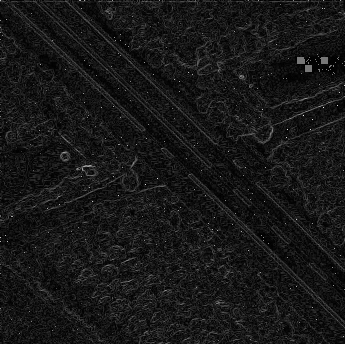

In [43]:
out =  roberts(image_np,threshold=0)
Image.fromarray(out)

#### Sobel&Prewitt

In [44]:
def sobel(image,threshold = 10):
    h,w = image.shape
    image_pad = np.pad(image,((1,1),(1,1)),"edge").astype(np.int32)
    out = np.zeros((h,w))
    for i in range(h):
        for j in range(w):
            fx = image_pad[i+2][j]+2*image_pad[i+2][j+1]+image_pad[i+2][j+2]-image_pad[i][j]-2*image_pad[i][j+1]-image_pad[i][j+2]
            fy = image_pad[i][j+2]+2*image_pad[i+1][j+2]+image_pad[i+2][j+2]-image_pad[i][j]-2*image_pad[i+1][j]-image_pad[i+2][j]
            g = abs(fx)+abs(fy)
            if g >= threshold:
                out[i][j] = g
            else:
                out[i][j] = image[i][j]
    out = np.clip(out,0,255)
    return np.uint8(out)

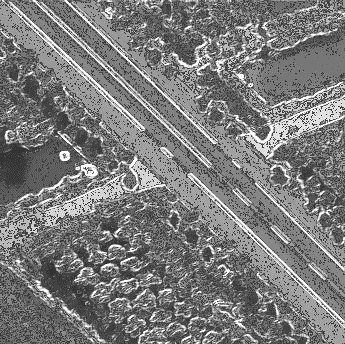

In [47]:
out = sobel(image_np,threshold=50)
Image.fromarray(out)

In [50]:
def prewitt(image,threshold = 10):
    h,w = image.shape
    image_pad = np.pad(image,((1,1),(1,1)),"edge").astype(np.int32)
    out = np.zeros((h,w))
    for i in range(h):
        for j in range(w):
            fx = image_pad[i+2][j]+image_pad[i+2][j+1]+image_pad[i+2][j+2]-image_pad[i][j]-image_pad[i][j+1]-image_pad[i][j+2]
            fy = image_pad[i][j+2]+image_pad[i+1][j+2]+image_pad[i+2][j+2]-image_pad[i][j]-image_pad[i+1][j]-image_pad[i+2][j]
            g = abs(fx)+abs(fy)
            if g >= threshold:
                out[i][j] = g
            else:
                out[i][j] = image[i][j]
    out = np.clip(out,0,255)
    return np.uint8(out)

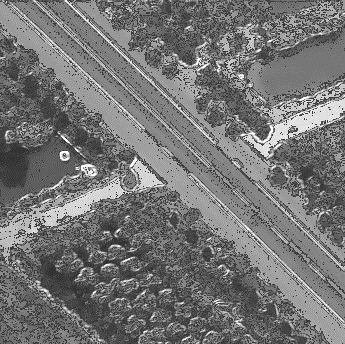

In [53]:
out = prewitt(image_np,threshold=50)
Image.fromarray(out)

#### laplace算子

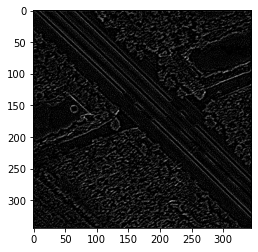

In [62]:
out = cv2.GaussianBlur(image_np, (3, 3), 0)
out = cv2.Laplacian(out,-1,3)
plt.imshow(out,"gray")

### 二值化

In [65]:
def binary_image(image,threshold = 100):
    h,w = image.shape
    out = np.zeros((h,w))
    for i in range(h):
        for j in range(w):
            if image[i][j] >= threshold:
                out[i][j] = 255
    return np.uint8(out)

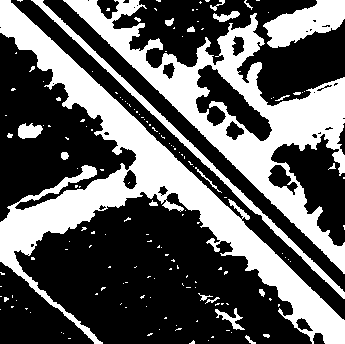

In [79]:
out = cv2.GaussianBlur(image_np,(3,3),0)
out = binary_image(out,threshold=140)
Image.fromarray(out)

In [95]:
def contour_extraction(image):
    h, w = image.shape
    image_pad = np.pad(image, ((1, 1), (1, 1)), "edge")
    image_pad = np.int32(image_pad)
    out = image.copy()
    for i in range(h):
        for j in range(w):
            if image_pad[i+1][j+1] == 0 and (image_pad[i][j]+image_pad[i][j+1]+image_pad[i][j+2]+image_pad[i+1][j]+image_pad[i+1][j+2]+image_pad[i+2][j]+image_pad[i+2][j+1]+image_pad[i+2][j+2] == 0):
                out[i][j] = 255
    return np.uint8(out)


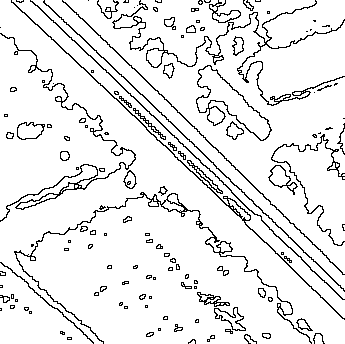

In [96]:
binary = out.copy()
contour = contour_extraction(binary)
Image.fromarray(contour)

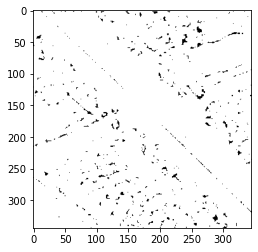

In [93]:
plt.imshow(out,"gray")